## Линейная алгебра: сходство текстов и аппроксимация функций

In [101]:
import numpy as np
from scipy.spatial.distance import cosine
import pandas as pd
import re
import functools
import operator
import matplotlib.pyplot as plt
from collections import Counter
from math import *
from scipy.linalg import solve
%matplotlib inline

In [8]:
strs = []
with open("sentences.txt", "r") as file:
    strs = file.readlines()
    strs = list(map(lambda x: x.replace("\n", "").lower(), strs))


> Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().

> Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.

> Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

In [32]:
mat_words = list(map(lambda x: re.split('[^a-z]', x), strs))
mat_words = [[word for word in doc if word != ''] for doc in mat_words] # deleting ''
all_words = functools.reduce(operator.add, mat_words)
occurences = Counter(all_words)
# words_indexed = [{val:idx} for idx, val in enumerate(occurences)]
words_indexed = {}
for idx, val in enumerate(occurences):
    words_indexed[val] = idx

> Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 ** 254.

In [38]:
X = np.zeros((22, 254))
for doc_idx, doc in enumerate(mat_words):
    for word in doc:
        X[doc_idx, words_indexed[word]] += 1
X.shape

(22, 254)

> Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание.

In [117]:
dists = [cosine(X[0, :], X[idx, :]) for idx in range(1, X.shape[0])]
dists = [(idx + 1, val) for idx, val in enumerate(dists)]
sorted_dists = sorted(dists, key=lambda x: x[1])
print(sorted_dists[0][0], sorted_dists[1][0])

6 4


> Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. 

> Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [106]:
def f(x):
    return np.sin(x / 5.0) * np.exp(x / 10.0) + 5.0 * np.exp(-x / 2.0)

def poly(w, x):
    shape = w.shape[0]
    shape_x = x.shape[0]
    x_powers = np.zeros((shape, shape_x))
    for idx in range(shape):
        x_powers[idx] = np.power(x, idx)
    return np.dot(w, x_powers)

y_1 = f(1)
y_2 = f(15)

A = np.array([[1.0, 1.0], [1.0, 15.0]])
b = np.array([f(1), f(15)]).reshape(2,)
sol2 = solve(A, b)

# plotting

x = np.linspace(1, 15, 1000)
y_1 = f(x)
y_2 = poly(sol2, x)


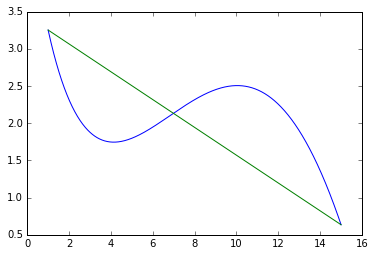

In [107]:
plt.plot(x, y_1)
plt.plot(x, y_2)

### Третья степень

In [110]:
def powerise(size, x):
    ret = np.zeros(size)
    for i in range(size):
        ret[i] = np.power(x, i)
    return ret
        

y_1 = f(1)
y_2 = f(15)
y_3 = f(8)

A = np.array([powerise(3, 1), powerise(3, 15), powerise(3, 8)])
b = np.array([y_1, y_2, y_3]).reshape(3, )
sol3 = solve(A, b)

x = np.linspace(1, 15, 1000)
y_1 = f(x)
y_2 = poly(sol3, x)

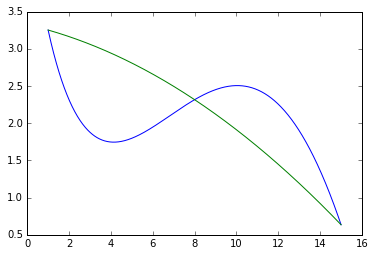

In [111]:
plt.plot(x, y_1)
plt.plot(x, y_2)

### Четвертая степень

In [114]:
y_1 = f(1)
y_2 = f(4)
y_3 = f(10)
y_4 = f(15)

A = np.array([powerise(4, 1), powerise(4, 4), powerise(4, 10), powerise(4, 15)])
b = np.array([y_1, y_2, y_3, y_4]).reshape(4, )
sol4 = solve(A, b)

x = np.linspace(1, 15, 1000)
y_1 = f(x)
y_2 = poly(sol4, x)

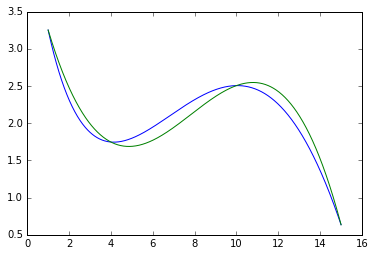

In [115]:
plt.plot(x, y_1)
plt.plot(x, y_2)

In [116]:
sol4

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])